In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dtrajs = list(np.load('dtrajs_uniform_time_k500.npy'))

In [4]:
import pyemma
its = pyemma.msm.its(dtrajs, nits=10)

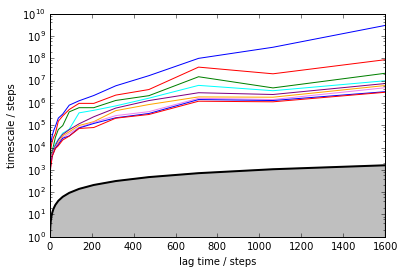

In [5]:
pyemma.plots.plot_implied_timescales(its)

In [6]:
lag_time = 700
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=lag_time)

In [7]:
msm.active_count_fraction

0.991051094622392

In [8]:
msm.active_state_fraction

0.986

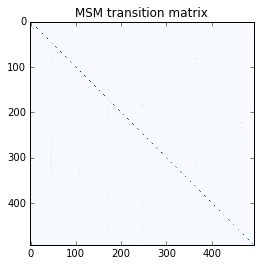

In [9]:
plt.imshow(msm.P,interpolation='none',cmap='Blues')
plt.title('MSM transition matrix')

In [10]:
np.trace(msm.P)

292.50963095026725

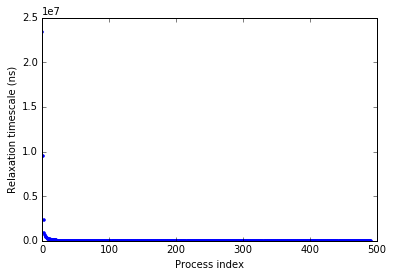

In [11]:
plt.plot(msm.timescales()/4,'.')
plt.xlabel('Process index')
plt.ylabel('Relaxation timescale (ns)')

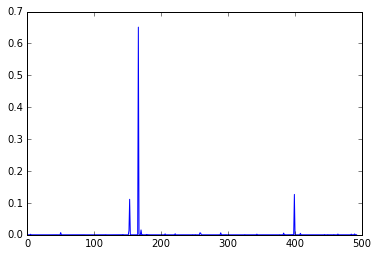

In [12]:
plt.plot(msm.stationary_distribution)

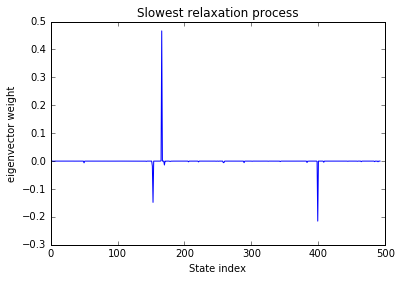

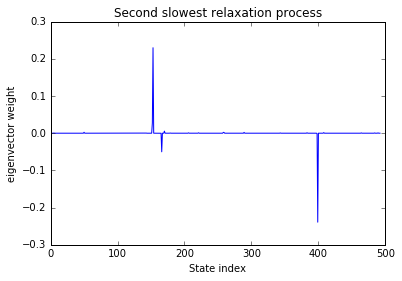

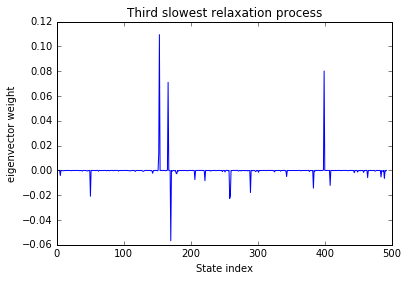

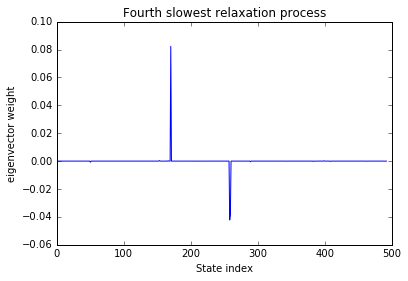

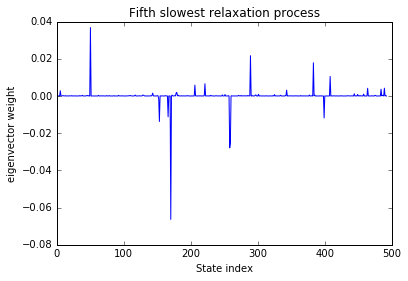

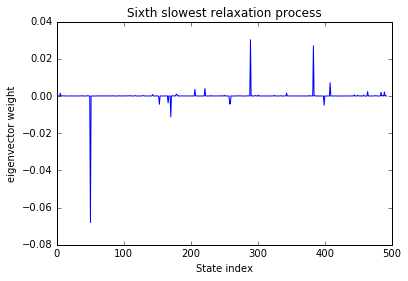

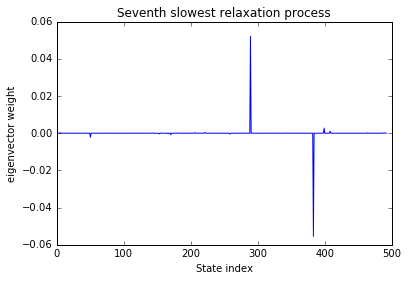

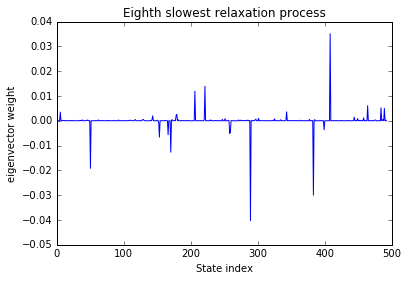

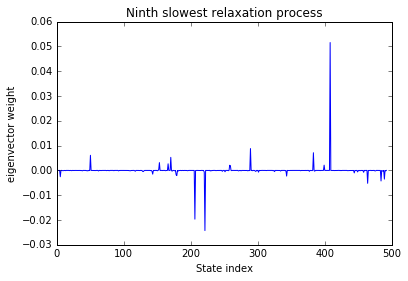

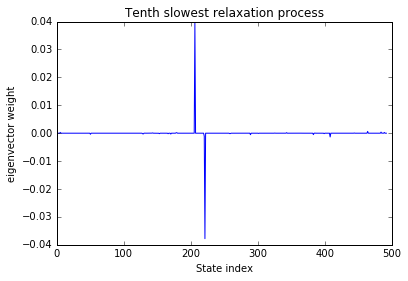

In [13]:
# let's plot the top 10 -- these will give us some interesting states to look at
names = 'Zeroth First Second Third Fourth Fifth Sixth Seventh Eighth Ninth Tenth'.split()
plt.plot(msm.eigenvectors_left()[1])
plt.xlabel('State index')
plt.ylabel('eigenvector weight')
plt.title('Slowest relaxation process')
for i in range(2,11):
    plt.figure()
    plt.plot(msm.eigenvectors_left()[i])
    plt.xlabel('State index')
    plt.ylabel('eigenvector weight')
    plt.title('{0} slowest relaxation process'.format(names[i]))

In [14]:
hmm = msm.coarse_grain(4)

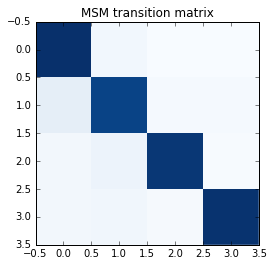

In [15]:
plt.imshow(hmm.P,interpolation='none',cmap='Blues')
plt.title('MSM transition matrix')

In [16]:
hmm.eigenvectors_left()

array([[ 0.59630004,  0.23297504,  0.07178479,  0.09894012],
       [-0.23705084, -0.00086547, -0.05452026,  0.29243657],
       [-0.30842082,  0.04343418,  0.24377393,  0.02121271],
       [-0.29901471,  0.42048828, -0.06506572, -0.05640785]])

In [20]:
hmm.timescales() / 4

array([ 3350.61313754,  2832.25657284,  1191.05774525])

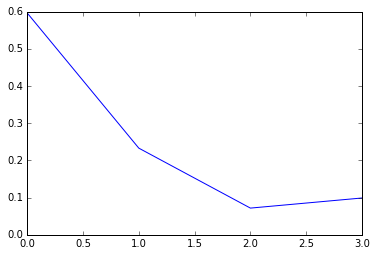

In [21]:
plt.plot(hmm.stationary_distribution)

(<matplotlib.figure.Figure at 0x11ecc7350>, array([[ 0.10168205,  0.39341468],
        [ 0.4727614 ,  0.60658134],
        [ 0.57445035,  0.        ],
        [ 0.        ,  1.        ]]))

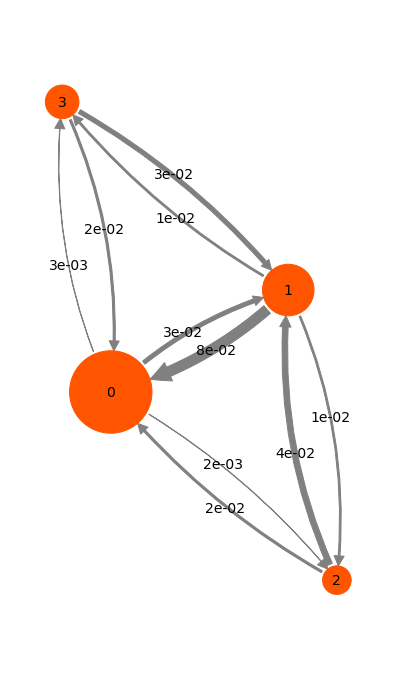

In [22]:
pyemma.plots.plot_markov_model(hmm)

In [23]:
samples = hmm.sample_by_observation_probabilities(10)

In [24]:
pwd

u'/Users/rafalpwiewiora/repos/MSM_play/dihedrals/ticalag50'

In [25]:
np.save('10samples_hmm', samples)

In [27]:
hmm.stationary_distribution

array([ 0.59630004,  0.23297504,  0.07178479,  0.09894012])

In [42]:
max(msm.count_matrix_active.sum(0))

118525.0

In [43]:
max(msm.stationary_distribution)

0.65121868469774802

In [48]:
for x in msm.stationary_distribution:
    if x > 0.6:
        print list(msm.stationary_distribution).index(x)

166


In [49]:
msm.stationary_distribution[166]

0.65121868469774802

In [50]:
msm.count_matrix_active.sum(0)[166]

7374.0

In [54]:
x = list(msm.count_matrix_active.sum(0))

In [58]:
for y in x:
    if y > 7370:
        print y
        print x.index(y)

8744.0
0
8709.0
1
14903.0
8
39653.0
9
18685.0
10
10727.0
11
11369.0
13
7490.0
19
14451.0
25
9641.0
29
10436.0
31
30378.0
34
9021.0
36
8947.0
41
43569.0
44
62411.0
46
16159.0
47
7619.0
62
10300.0
66
33633.0
85
67696.0
92
8710.0
93
7953.0
96
9543.0
105
7437.0
106
9712.0
107
52050.0
108
9295.0
109
10423.0
111
7473.0
112
12664.0
113
8874.0
114
8916.0
116
10324.0
124
12026.0
127
9047.0
128
9669.0
130
10311.0
134
16200.0
138
7618.0
140
8310.0
143
8291.0
145
13716.0
150
8177.0
154
10879.0
163
7374.0
166
118525.0
172
8480.0
175
10917.0
177
9178.0
181
27367.0
186
7463.0
187
8688.0
189
12165.0
191
19508.0
193
45716.0
195
18105.0
207
9293.0
208
12345.0
218
8622.0
226
13568.0
232
9125.0
237
19395.0
238
9766.0
239
118160.0
247
9583.0
254
38902.0
256
7682.0
258
62891.0
271
10415.0
275
7631.0
277
17157.0
280
18176.0
282
8011.0
286
7557.0
287
17886.0
288
8756.0
292
8661.0
297
10278.0
299
10637.0
303
7806.0
308
10260.0
312
20232.0
313
9748.0
318
7444.0
323
11279.0
325
8591.0
334
8684.0
336
34392.0
341


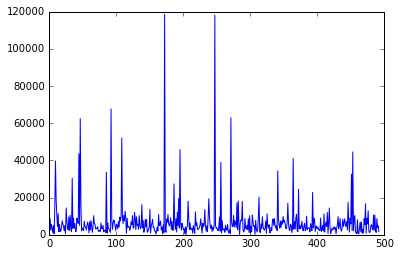

In [59]:
plt.plot(msm.count_matrix_active.sum(0))

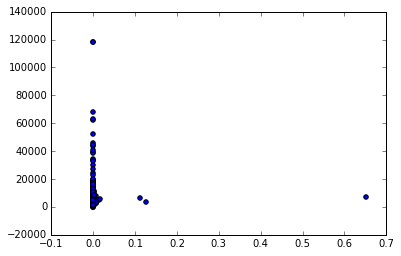

In [60]:
plt.scatter(msm.stationary_distribution, msm.count_matrix_active.sum(0))